## Heart disease prediction [decision tree]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('heart_v2.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [4]:
data.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [5]:
data.shape

(270, 5)

In [6]:
data.columns

Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')

In [7]:
#put feature variable to x
X = data.drop('heart disease', axis =1)

In [8]:
X.head()

,age,sex,BP,cholestrol
0,70,1,130,322
1,67,0,115,564
2,57,1,124,261
3,64,1,128,263
4,74,0,120,269


In [9]:
# Put response variable to Y
Y = data['heart disease']

In [10]:
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: heart disease, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

### Train -Test spliting

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 42)

In [13]:
X_train.shape

(189, 4)

In [14]:
X_test.shape

(81, 4)

### Build decision tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
# Using all default parameters except depth
dt = DecisionTreeClassifier(max_depth=3)

In [17]:
dt.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

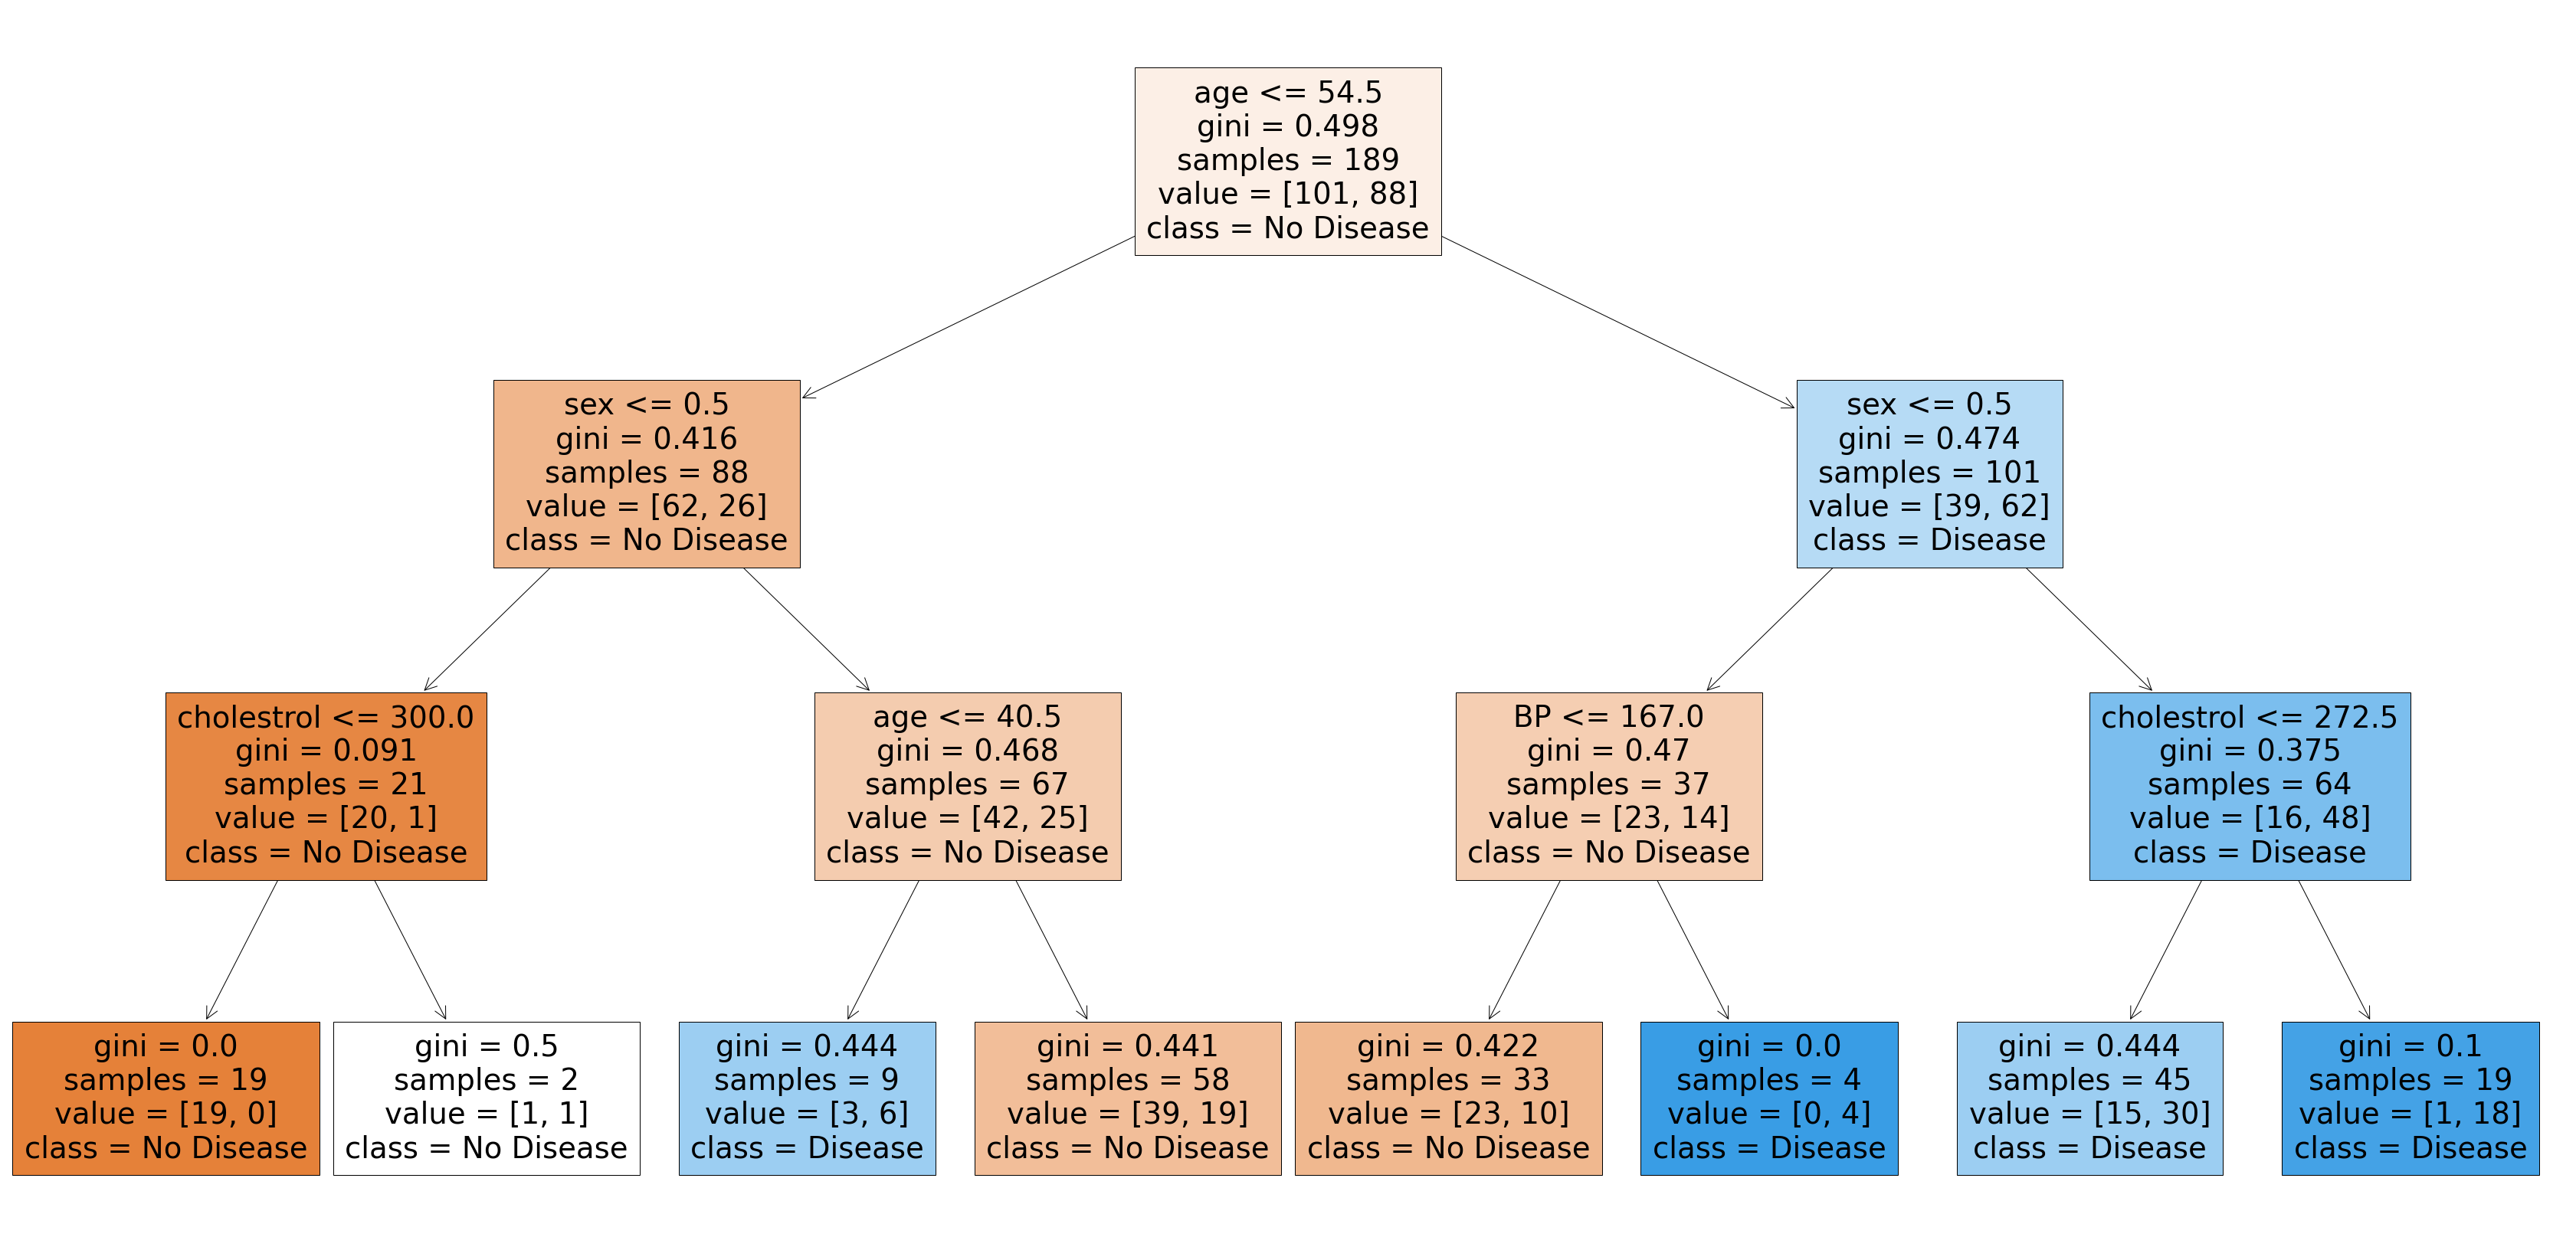

In [24]:
from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = X.columns,class_names=['No Disease', "Disease"],filled=True);

In [28]:
Y_train_pred = dt.predict(X_train)
Y_test_pred = dt.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [29]:
print(accuracy_score(Y_train, Y_train_pred))
confusion_matrix(Y_train, Y_train_pred)

0.7407407407407407


array([[82, 19],
       [30, 58]], dtype=int64)

In [31]:
print(accuracy_score(Y_test, Y_test_pred))
confusion_matrix(Y_test, Y_test_pred)

0.6049382716049383


array([[35, 14],
       [18, 14]], dtype=int64)